In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
from desert import isnum
from pfunctions import getTimeSteps
from FGMTableV2 import *
from readOFFiles import *
from scipy.interpolate import interp1d
from tableProperties import FGMtableProperties
from lookup import lookup
from oneDCaseReader import oneDCaseReader
import pickle

In [2]:
FGMtableDict = {}
case1000AdaptiveRoute = "../../Cases/nhep1d/nhep1d1000Adaptive/"
case1000Route         = "../../Cases/nhep1d/nhep1d1000/"
case5000AdaptiveRoute = "../../Cases/nhep1d/nhep1d5000Adaptive/"
case5000Route         = "../../Cases/nhep1d/nhep1d5000/"
case1000DualFuelRoute = "../../Cases/dualFuel1d/DNS1000/"
case4000DualFuelRoute = "../../Cases/dualFuel1d/DNS4000/"


FGMtableDict["route"] = case5000AdaptiveRoute
FGMtableDict["Zrange"] = (0.,1.)
FGMtableDict["fuelList"] = ["C7H16"]
FGMtableDict["gridNumber"] = (301,501)
FGMtableDict["gridPower"] = (2,1)
FGMtableDict["extraLookupFields"] = ["Qdot", "OH","C7H15O2"]
FGMtableDict["PVFields"] = ["N2","CO2","CO","HO2","CH2O","H2O"]
FGMtableDict["PVCoeffs"] = [1.,1.2, 0.9, 2.7, 1.5, 1.2]
FGMtableDict["PVConstant"] = 1.
# FGMtableDict["PVFields"] = ["CO2","CO","HO2","CH2O","H2O"]
# FGMtableDict["PVCoeffs"] = [1.2, 0.9, 2.7, 1.5, 1.2]
# FGMtableDict["PVConstant"] = 0.


obj = FGMtable(FGMtableDict)
obj.Allrun("./","./table_m2a5000/")

ZRange: (0.0, 1.0)
grid number in Z/C dimensions: (301, 501)
grid power  in Z/C dimensions: (2, 1)
PV expression: 
1.0xN2+1.2xCO2+0.9xCO+2.7xHO2+1.5xCH2O+1.2xH2O+ 1.0
Lookup Fields: ['thermo:psi', 'thermo:kappa', 'thermo:mu', 'T', 'PVMax', 'PVMin', 'SourcePV', 'C7H16', 'Qdot', 'OH', 'C7H15O2']


Reading data from time = 0.0015952727273


Converting data to pandas array

Adding PV

Adding SourcePV

Constructing data for all timesteps
Constructing data for time = 0.0015952727273


Checking monotonic properties
	 Repairing time = 0.0015852727273

Calculating PVMinMax and scaled PV



Generating FGM tables
Dealing with field thermo:psi
Dealing with field thermo:kappa
Dealing with field thermo:mu
Dealing with field T
Dealing with field SourcePV
Dealing with field C7H16
Dealing with field Qdot
Dealing with field OH
Dealing with field C7H15O2


writing ./table_m2a5000/psi_table
writing ./table_m2a5000/kappa_table
writing ./table_m2a5000/mu_table
writing ./table_m2a5000/T_table
writing ./table

In [3]:
obj.statistics()


Adding ZIndex for post-processing



Get PVmin, PVmax, and scaledPV for post-processing

Adding CIndex for post-processing




/home/zhouyuchen/Desktop/workspace/Tabulations/pyFGMTable/FGMTableV2.py:456: RuntimeWarning: Mean of empty slice
  statisticsCabins[ZI][CI][lookupField]["mean"] = np.nanmean(resultCabins[ZI][CI][lookupField])


In [ ]:
with open("./table_m2a1000/obj.pkl","rb") as file:
    obj = pickle.load(file)
    
obj.statistics()

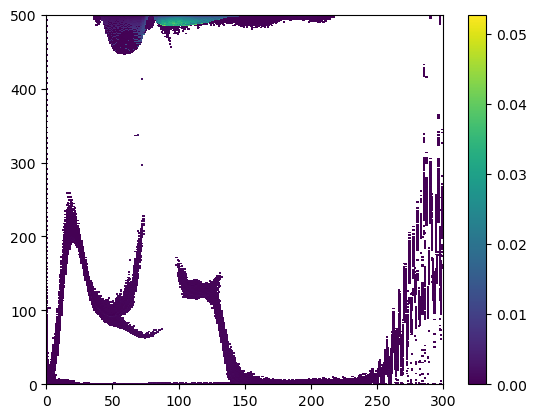

In [4]:
field = "T"
Tfield = np.zeros((len(obj.CCenterList), len(obj.ZCenterList)))
TstdField = np.zeros((len(obj.CCenterList), len(obj.ZCenterList)))
for ZI in range(len(obj.ZCenterList)):
    for CI in range(len(obj.CCenterList)):
        Tfield[CI][ZI] = obj.statisticsCabins[ZI][CI][field]["mean"]
        TstdField[CI][ZI] = obj.statisticsCabins[ZI][CI][field]["std"]


ratio = TstdField/(Tfield + 1e-7)
plt.pcolor(ratio)
# plt.xlim([80,120])
# plt.ylim([460,500])
plt.colorbar()